### <center> Análise e mineração de texto + Classificação de emoção (NLP) </center>

#### Base de Dados
kaggle.com/datasets/leandrodoze/tweets-from-mgbr

In [1]:
##Importação de biblioteca
import pandas as pd
import numpy as np

##Biblioteca de grafico
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Avisos
import warnings 
warnings.filterwarnings('ignore')

## Configuração
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn-darkgrid')

##Biblioteca Adicionais
import re #REGEX
import nltk # NLP

In [2]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
## Ler a BASE DE DADOS
base_dados = pd.read_csv('Tweets_Mg.csv')

#Dimensão
base_dados.shape

(8199, 26)

In [4]:
base_dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---:> Postagem:
    vai ser encontrados:
        textos, emojis, abreviaçoes, !@#$&%, ..;:D|, links
---:> Pesquisa:
    texto [grandes texto]

---:> NPS (pegar a base e  classificar na unha) ==> treina o modelo ===> classificar

In [5]:
base_dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

#### Modelagem dos dados & EDA(Exploração)

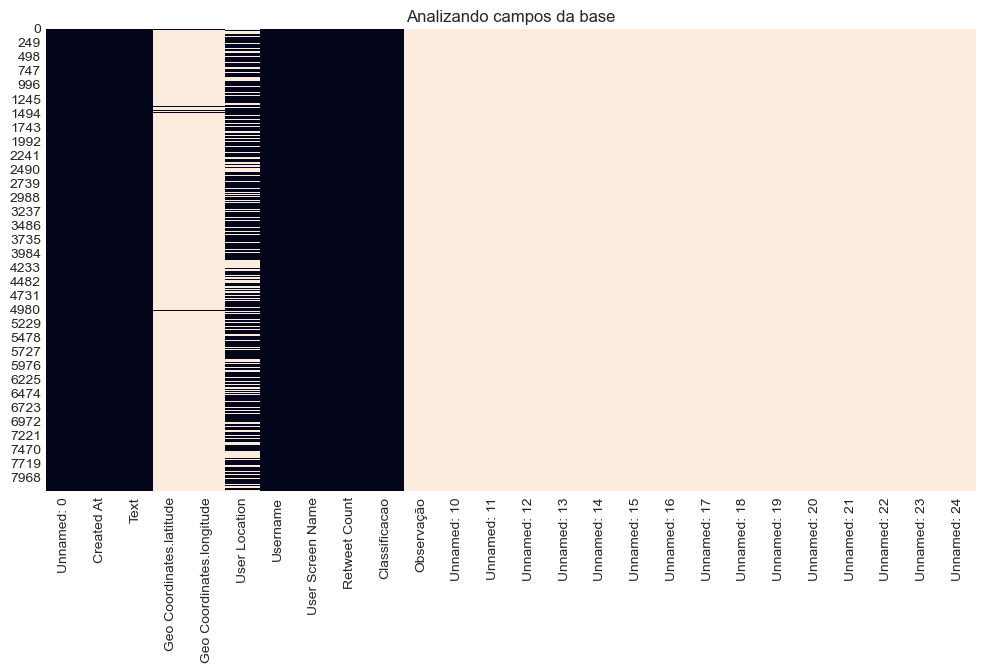

In [6]:
##base_dados.isnull().sum()
nulo_da_base = base_dados.isnull()

plt.title('Analizando campos da base')


sns.heatmap(nulo_da_base, cbar=False);

In [7]:
## REMOVENDO COLUNAS QUE POSSUEM DADOS NULOS
base_limpa = base_dados.columns[10:]
base_dados.drop(columns=base_limpa, inplace=True)
base_dados

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo
...,...,...,...,...,...,...,...,...,...,...
8194,8194,Thu Feb 09 11:48:07 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,NaN,Ana Lúcia,lapiseirapentel,0,Positivo
8195,8195,Thu Feb 09 12:10:19 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Belo Horizonte - Minas Gerais,Marcelo Rezende,Televans,0,Positivo
8196,8196,Thu Feb 09 12:04:17 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Guarulhos - SP,Leonardo Nascimento,leonardogru,0,Positivo
8197,8197,Thu Feb 09 12:10:04 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Brasil Natal/RN,Lucas Medeiros �©™,parabolicalucas,0,Positivo


In [8]:
base_dados.isnull().sum()

Unnamed: 0                      0
Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
dtype: int64

In [9]:
base_dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [10]:
base_dados.drop(columns='Unnamed: 0', inplace=True)
base_dados

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo
...,...,...,...,...,...,...,...,...,...
8194,Thu Feb 09 11:48:07 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,NaN,Ana Lúcia,lapiseirapentel,0,Positivo
8195,Thu Feb 09 12:10:19 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Belo Horizonte - Minas Gerais,Marcelo Rezende,Televans,0,Positivo
8196,Thu Feb 09 12:04:17 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Guarulhos - SP,Leonardo Nascimento,leonardogru,0,Positivo
8197,Thu Feb 09 12:10:04 +0000 2017,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Brasil Natal/RN,Lucas Medeiros �©™,parabolicalucas,0,Positivo


In [11]:
#INFO
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


### Minerando Datas

In [12]:
base_dados['Created At'][0]

'Sun Jan 08 01:22:05 +0000 2017'

In [13]:
from dateutil.parser import parse
formatacao_data = base_dados['Created At'][0]
print(f'Antes: {formatacao_data}')
print(f'Depois: {parse(formatacao_data).date()}')


Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [14]:
# CRIANDO FUNÇÃO PARA CONVERTER DATA NA BASE DE DADOS
def AjustarData(Data):
    '''
        Função para ajustar data vindas da base do twitter
    '''
#Atribuir
    texto_data = Data
#Transform
    transformacao = parse(texto_data)
#Extração
    dataFormatada = transformacao.date()
#retorno
    return dataFormatada

In [15]:
# ALTERANDO A BASE DE DADOS ATRAVES DA FUNÇÃO
base_dados['Data_Formatada'] = base_dados['Created At'].apply(AjustarData)
base_dados.iloc[:, 1:]

,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08
2,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08
3,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09
...,...,...,...,...,...,...,...,...,...
8194,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,NaN,Ana Lúcia,lapiseirapentel,0,Positivo,2017-02-09
8195,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Belo Horizonte - Minas Gerais,Marcelo Rezende,Televans,0,Positivo,2017-02-09
8196,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Guarulhos - SP,Leonardo Nascimento,leonardogru,0,Positivo,2017-02-09
8197,"Trio é preso suspeito de roubo, tráfico e abus...",NaN,NaN,Brasil Natal/RN,Lucas Medeiros �©™,parabolicalucas,0,Positivo,2017-02-09


In [16]:
#Alterando data pela Função Lambda
#Outra maneira de criar coluna e formatar a data
base_dados['Created At'].apply(lambda Texto : parse(Texto).date())
base_dados.iloc[:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,Wândell,klefnews,0,Neutro,2017-01-08
2,Wândell,klefnews,0,Neutro,2017-01-08
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,Emily,Milly777,0,Negativo,2017-01-09


In [17]:
## SEPARANDO A DATA EM MES, DIA E ANO.
    ## UTILIZANDO O DATETIME AO INVES DE DATE
base_dados['Data_Formatada'] = pd.to_datetime(base_dados['Data_Formatada'])

        ## EXTRAINDO ANO

base_dados['ANO'] = base_dados['Data_Formatada'].dt.year
base_dados.iloc[:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,ANO
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017
1,Wândell,klefnews,0,Neutro,2017-01-08,2017
2,Wândell,klefnews,0,Neutro,2017-01-08,2017
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017
4,Emily,Milly777,0,Negativo,2017-01-09,2017


In [18]:
base_dados['MES'] = base_dados['Data_Formatada'].dt.month
base_dados['DIA'] = base_dados['Data_Formatada'].dt.day
base_dados.iloc[5:10, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,ANO,MES,DIA
5,Maristela Guimarães,florpimenta,0,Neutro,2017-01-07,2017,1,7
6,Adriano,almanakfc,0,Neutro,2017-01-04,2017,1,4
7,Editora Nemo,editoranemo,2,Neutro,2017-01-08,2017,1,8
8,Minas Previ,MinasPrevi,0,Negativo,2017-01-04,2017,1,4
9,Marina.,mmarinaey,0,Neutro,2017-01-07,2017,1,7


In [19]:
## AGRUDANDO QUANTIDADE DE TWETS POR MES
base_dados.groupby(by=['ANO', 'MES']).agg(
    Quantidade = ('Username', 'count')
)

Quantidade
ANO  MES            
2016 12            3
2017 1          7073
     2          1123

Explore sempre o máximo dos dados possíveis, para entender de onde veio as informações contidas na base de dados

### Minerando Geo-Localização

In [20]:
%pip install wordcloud

from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


In [21]:
#Espaço entre palavras
concatenar = ' '

#loop para buscar cada tweet
    #Teste
for loop in base_dados['Text'].head(15):

    print(loop)

���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ
� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf
�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw
��� https://t.co/BnDsO34qK0
��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5
" bom é bandido morto"
Deputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas https://t.co/3GfAqvrFHS
"..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fN5evlLQsR
"A gigantesca barba do mal" em destaque no caderno Cultura do Estado de Minas. https://t.co/PxNurIkTlw
"BB e governo de Minas travam disputa sobre depósitos judiciais" https://t.co/CnMu2A2Qo5
"com vcs bh fica pequena!" Belo Horizonte (pron. [bɛloɾiˈzõntʃi][10]) é a capital do estado de MG, com uma área de aproximadamente 331 km²
"Daí a gente visita gover

In [22]:
#Espaço entre palavras
concatenar = ''

#Loop no texto
for loop in base_dados['Text']:
    for palavra in loop.split():
        #Juntando as palavras
        concatenar = concatenar + ' ' + palavra

print(f'Quantidade de palavras agrupadas {len(concatenar)}')

Quantidade de palavras agrupadas 961415


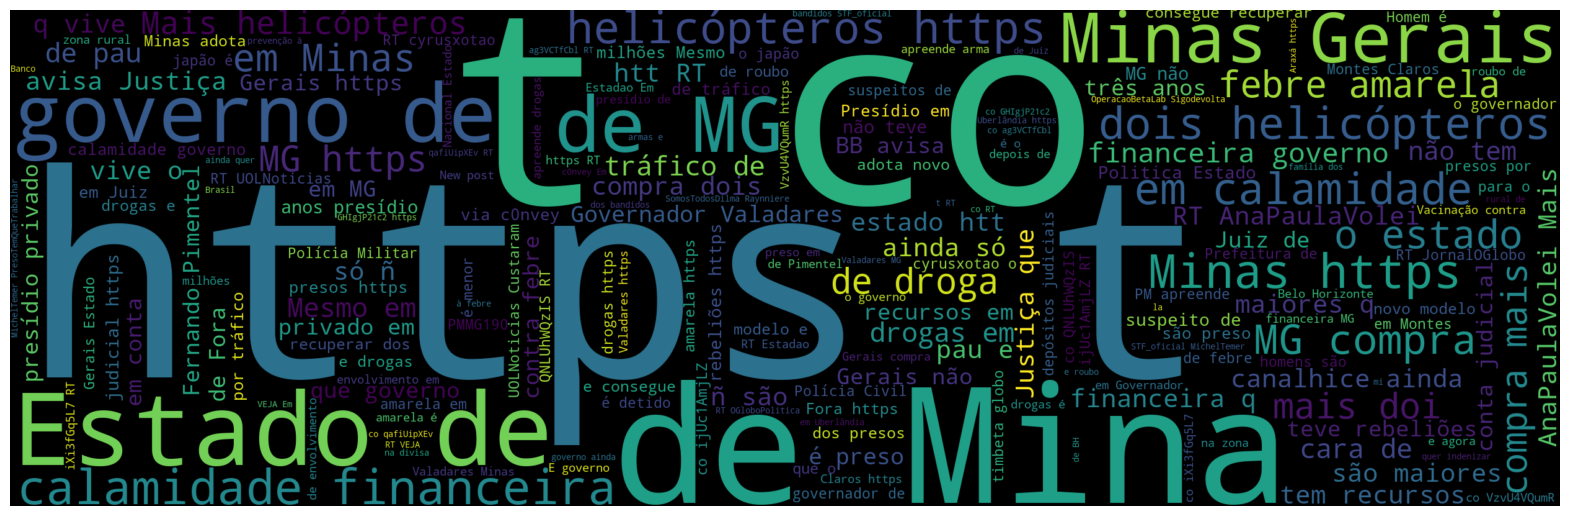

In [23]:
#Plot

#Instanciando a WordCloud
Nuvem_Palavras = WordCloud(width=2500, height=800).generate(concatenar)

#Tamanho
Figura, Eixo = plt.subplots(figsize=(20, 7))
#Plot
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')
#Desativa os grids
Eixo.set_axis_off()

In [24]:
##ANALISE DE SENTIMENTOS
base_dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [25]:
base_dados['Classificacao'].value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

In [26]:
### Ajuste de textos
palavraPositiva = ''
palavraNeutra = ''
palavraNegativa = ''

#Segmentação de sentimentos
for sentimento in base_dados['Classificacao'].unique():
    ## Sentimento Positivo
    if sentimento == 'Positivo':
        FiltroPositivo = base_dados.loc[base_dados['Classificacao'] == sentimento]

        ##Loop para concatenar os sentimentos positivos
        for palavra in FiltroPositivo['Text']:
            for quebra in palavra.split():
                palavraPositiva = palavraPositiva + ' ' + quebra
    
    ##Sentimento Neutro
    elif sentimento == 'Neutro':
        FiltroNeutro = base_dados.loc[base_dados['Classificacao'] == sentimento]

        ##Loop para concatenar os sentimentos neutros
        for palavra in FiltroNeutro['Text']:
            for quebra in palavra.split():
                palavraNeutra = palavraNeutra + ' ' + quebra
    
    ##Sentimento Negativa
    else:
        FiltroNegativa = base_dados.loc[base_dados['Classificacao'] == sentimento]

        ##Loop para concatenar os sentimentos neutros
        for palavra in FiltroNegativa['Text']:
            for quebra in palavra.split():
                palavraNegativa = palavraNegativa + ' ' + quebra

##Informando a quantidade de palavras por tipo de sentimento
print(
    'Quantidade de palavras: \n',
    f'Positiva: {len(palavraPositiva)}\n',
    f'Neutra: {len(palavraNeutra)}\n',
    f'Negativa: {len(palavraNegativa)}'
)

Quantidade de palavras: 
 Positiva: 374456
 Neutra: 279383
 Negativa: 307576


#### CRIANDO WORDCLOUD SEGMENTADO POR SENTIMENTO

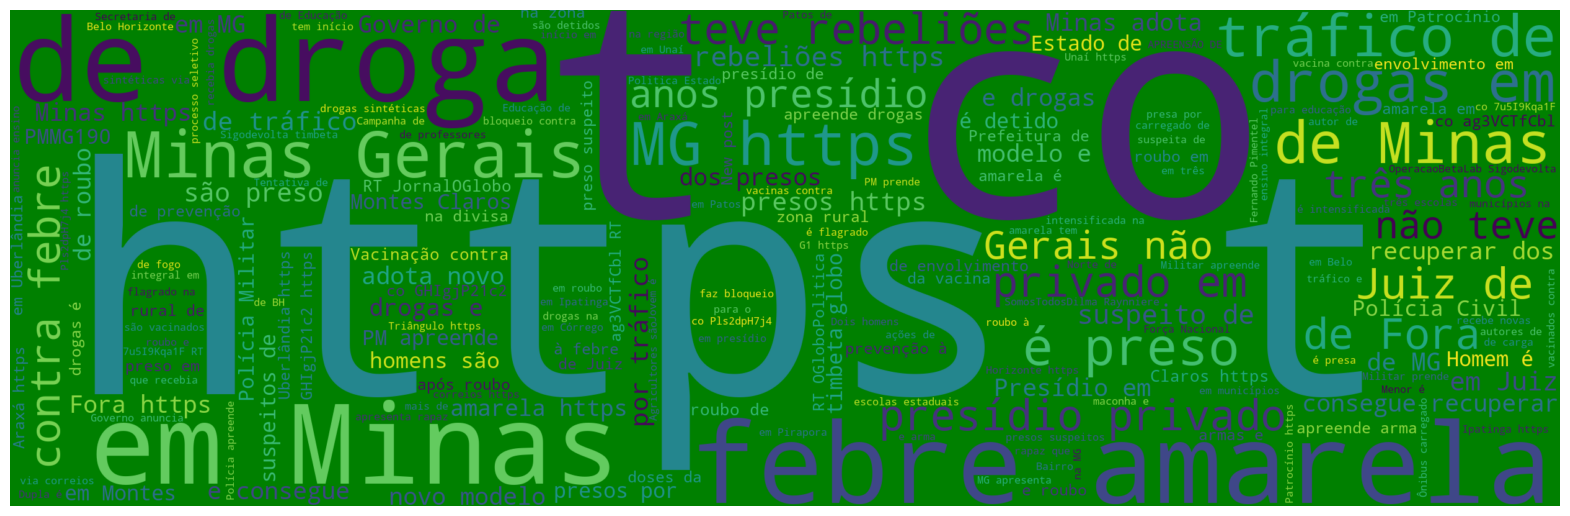

In [27]:
#SENTIMENTO POSITIVO

#Instanciando a WordCloud
Nuvem_Palavras = WordCloud(width=2500, height=800, background_color='green').generate(palavraPositiva)

#Tamanho
Figura, Eixo = plt.subplots(figsize=(20, 7))
#Plot
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')
#Desativa os grids
Eixo.set_axis_off()

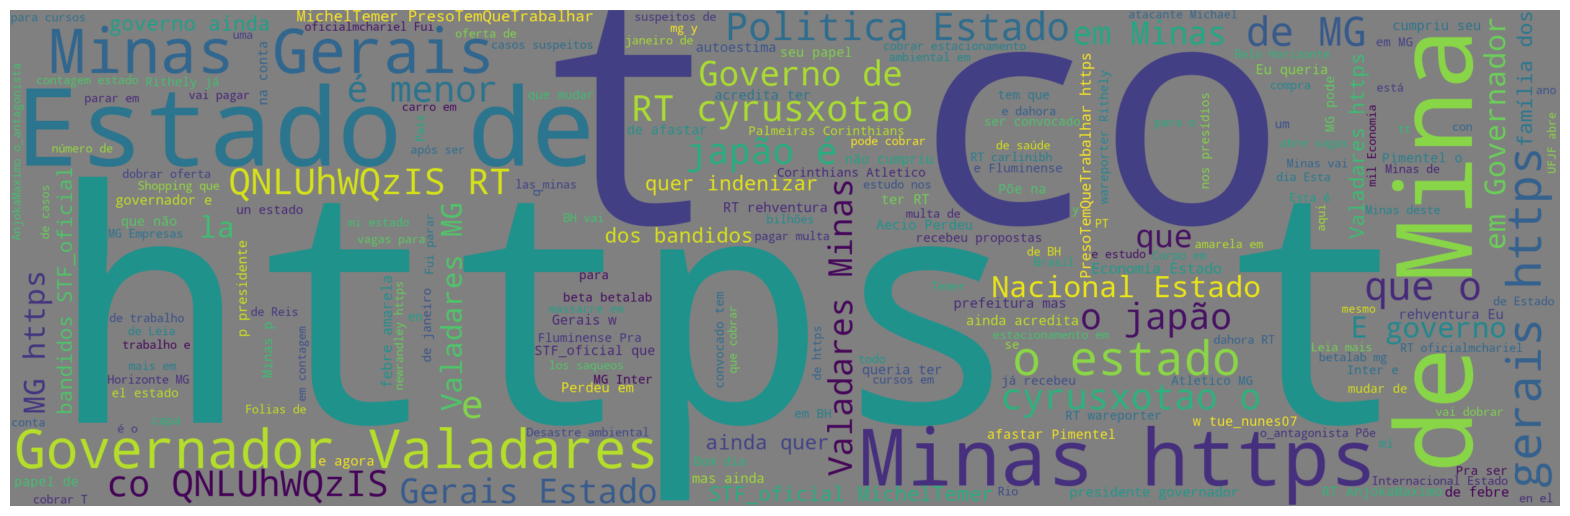

In [28]:
#SENTIMENTO NEUTRO

#Instanciando a WordCloud
Nuvem_Palavras = WordCloud(width=2500, height=800, background_color='GRAY').generate(palavraNeutra)

#Tamanho
Figura, Eixo = plt.subplots(figsize=(20, 7))
#Plot
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')
#Desativa os grids
Eixo.set_axis_off()

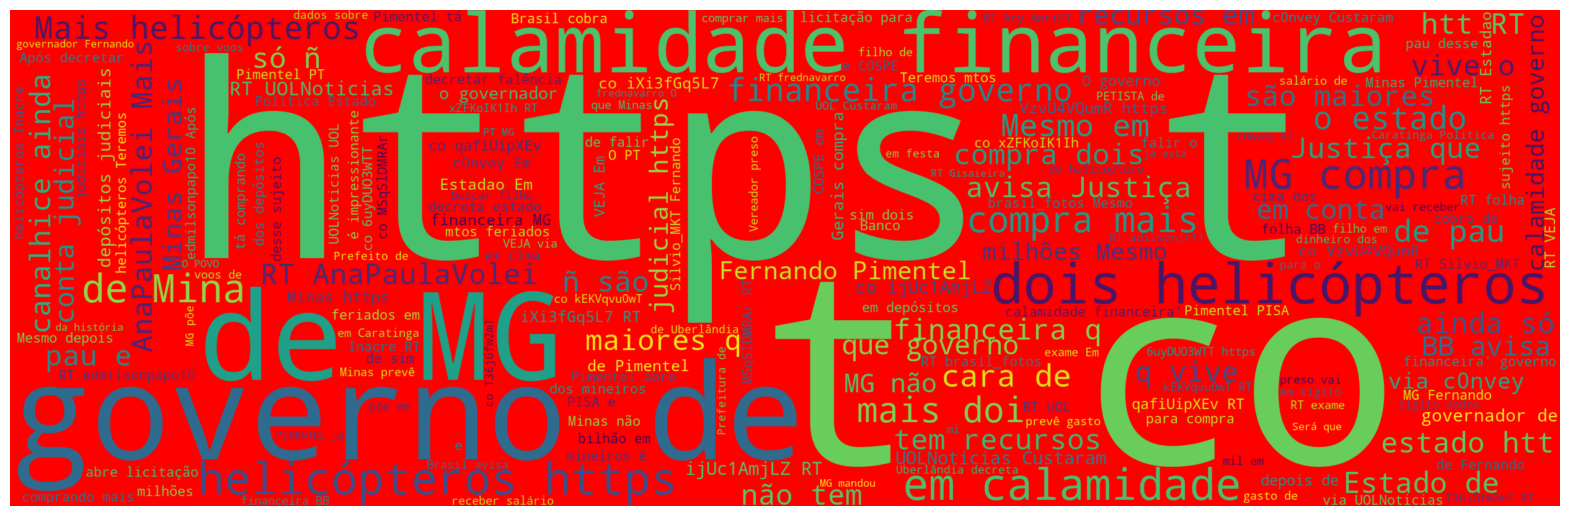

In [29]:
#SENTIMENTO NEGATIVO

#Instanciando a WordCloud
Nuvem_Palavras = WordCloud(width=2500, height=800, background_color='red').generate(palavraNegativa)

#Tamanho
Figura, Eixo = plt.subplots(figsize=(20, 7))
#Plot
Eixo.imshow(Nuvem_Palavras, interpolation='bilinear')
#Desativa os grids
Eixo.set_axis_off()

#### Rank de repetição de Palavras

In [30]:
# Função para contar+ palavra
from collections import Counter

In [31]:
#Quebra as frases
quebraFrases = base_dados['Text'].apply(lambda Texto : str(Texto).split())

In [32]:
quebraFrases[0:10]

0    [���⛪, @, Catedral, de, Santo, Antônio, -, Gov...
1    [�, @, Governador, Valadares,, Minas, Gerais, ...
2    [��, @, Governador, Valadares,, Minas, Gerais,...
3                       [���, https://t.co/BnDsO34qK0]
4    [���, PSOL, vai, questionar, aumento, de, vere...
5    [", bom, é, bandido, morto", Deputado, Cabo, J...
6    ["..E, 25%, dos, mineiros, dizem, não, torcer,...
7    ["A, gigantesca, barba, do, mal", em, destaque...
8    ["BB, e, governo, de, Minas, travam, disputa, ...
9    ["com, vcs, bh, fica, pequena!", Belo, Horizon...
Name: Text, dtype: object

In [35]:
## CRIANDO O RANK DE PALAVRAS
dadosRank = Counter(
    [item for sublista in quebraFrases for item in sublista]
)

dadosRank

Counter({'���⛪': 1,
         '@': 14,
         'Catedral': 1,
         'de': 8352,
         'Santo': 3,
         'Antônio': 1,
         '-': 1937,
         'Governador': 377,
         'Valadares/MG': 4,
         'https://t.co/JSbKamIqUJ': 1,
         '�': 55,
         'Valadares,': 128,
         'Minas': 2626,
         'Gerais': 920,
         'https://t.co/B3ThIDJCSf': 1,
         '��': 16,
         'https://t.co/dPkgzVR2Qw': 1,
         '���': 14,
         'https://t.co/BnDsO34qK0': 2,
         'PSOL': 3,
         'vai': 162,
         'questionar': 3,
         'aumento': 13,
         'vereadores': 8,
         'e': 2079,
         'prefeito': 34,
         'BH': 130,
         'na': 523,
         'Justiça': 337,
         'Politica': 221,
         'Estado': 1282,
         'https://t.co/DMg7BGsek5': 1,
         '"': 14,
         'bom': 8,
         'é': 1214,
         'bandido': 5,
         'morto"': 1,
         'Deputado': 5,
         'Cabo': 5,
         'Júlio': 8,
         'condenado': 5,

In [41]:
##TABELA PARA RANKEAR E CRIAR GRAFICOS DE DISTRIBUIÇÃO
tabQuantidade = pd.DataFrame(dadosRank.most_common(30))

## CRIANDO AS COLUNAS PARA A TABELA
tabQuantidade.columns = ['Palavra', 'Qtd']

tabQuantidade

,Palavra,Qtd
0,de,8352
1,em,4003
2,RT,3080
3,Minas,2626
4,e,2079
5,-,1937
6,MG,1849
7,a,1707
8,o,1419
9,do,1415


In [48]:
## Trazendo as informações graficamente
Figura = px.bar(
    tabQuantidade, 
    x = 'Qtd',
    y = 'Palavra',
    color = 'Palavra',
    orientation = 'h',
    width=1150, 
    height=800
)

Figura.show()